# ~Heat~ Maps


In [ ]:
!pip install shapely
!pip install descartes
!pip install geopandas
!pip install folium

     |████████████████████████████████| 1.0 MB 17.5 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 962 kB 24.3 MB/s 
     |████████████████████████████████| 6.4 MB 67.1 MB/s 
     |████████████████████████████████| 14.8 MB 63.8 MB/s 
     |████████████████████████████████| 82 kB 3.2 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 93 kB 4.0 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import datetime

from shapely.geometry import Polygon, mapping, Point
import geopandas as gpd
import folium
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
cali_shape = gpd.read_file('/home/jovyan/work/CA_counties')
cali_shape.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,107,00277318,06107,Tulare,Tulare County,06,H1,G4020,None,47300,None,A,12494707314,37391604,+36.2288317,-118.7810618,"POLYGON ((-118.36059 36.74477, -118.36013 36.7..."
1,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820029,43810423,+38.1846184,-120.5593996,"POLYGON ((-120.01995 38.43352, -120.02020 38.4..."
2,06,047,00277288,06047,Merced,Merced County,06,H1,G4020,None,32900,None,A,5011554680,112760479,+37.1948063,-120.7228019,"POLYGON ((-120.05205 37.18311, -120.05215 37.1..."
3,06,079,00277304,06079,San Luis Obispo,San Luis Obispo County,06,H1,G4020,None,42020,None,A,8543230300,820974619,+35.3852268,-120.4475409,"POLYGON ((-120.21398 35.78928, -120.20627 35.7..."
4,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,42220,None,A,4081430061,497530414,+38.5250258,-122.9376050,"MULTIPOLYGON (((-122.51299 38.13180, -122.4956..."


In [ ]:
data = pd.read_csv("/home/jovyan/work/heatmap_9_19.csv")

In [ ]:
cali_9_19 = pd.merge(cali_shape, data, how = 'left', left_on = "NAME", right_on = "incident_county")
cali_9_19.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Unnamed: 0,incident_county,nwcg_class
0,06,107,00277318,06107,Tulare,Tulare County,06,H1,G4020,None,...,None,A,12494707314,37391604,+36.2288317,-118.7810618,"POLYGON ((-118.36059 36.74477, -118.36013 36.7...",NaN,NaN,NaN
1,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,...,None,A,2641820029,43810423,+38.1846184,-120.5593996,"POLYGON ((-120.01995 38.43352, -120.02020 38.4...",NaN,NaN,NaN
2,06,047,00277288,06047,Merced,Merced County,06,H1,G4020,None,...,None,A,5011554680,112760479,+37.1948063,-120.7228019,"POLYGON ((-120.05205 37.18311, -120.05215 37.1...",NaN,NaN,NaN
3,06,079,00277304,06079,San Luis Obispo,San Luis Obispo County,06,H1,G4020,None,...,None,A,8543230300,820974619,+35.3852268,-120.4475409,"POLYGON ((-120.21398 35.78928, -120.20627 35.7...",615.0,San Luis Obispo,3.0
4,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,...,None,A,4081430061,497530414,+38.5250258,-122.9376050,"MULTIPOLYGON (((-122.51299 38.13180, -122.4956...",NaN,NaN,NaN


In [ ]:
wildfire_data = pd.read_csv('mapdataall.csv')

# Enforce latitude and longitude limits to remove incorrect data
wildfire_data = wildfire_data.loc[(wildfire_data['incident_longitude'] > -125) & 
                (wildfire_data['incident_longitude'] < -116) &
                (wildfire_data['incident_latitude'] > 32) &
                (wildfire_data['incident_latitude'] < 55)]

# Drop irrelevant columns
wildfire_data.drop(['incident_name', 'incident_is_final', 'incident_date_last_update', 
                    'incident_date_created', 'incident_administrative_unit', 'incident_administrative_unit_url',
                    'incident_location', 'incident_containment', 'incident_control',
                    'incident_cooperating_agencies', 'incident_type', 'incident_id',
                    'incident_url', 'incident_date_extinguished', 'is_active',
                    'calfire_incident', 'notification_desired'], axis=1, inplace=True)

# Convert date created to a date object
wildfire_data['incident_dateonly_created'] = pd.to_datetime(wildfire_data['incident_dateonly_created'])

# Add month and year columns
wildfire_data['month'] = wildfire_data['incident_dateonly_created'].dt.month
wildfire_data['year'] = wildfire_data['incident_dateonly_created'].dt.year
wildfire_data.drop(['incident_dateonly_created'], axis=1, inplace=True)

wildfire_data = wildfire_data.reset_index(drop=True)
wildfire_data['incident_dateonly_extinguished'] = pd.to_datetime(wildfire_data['incident_dateonly_extinguished'])
wildfire_data.head()

,incident_county,incident_acres_burned,incident_longitude,incident_latitude,incident_dateonly_extinguished,month,year
0,Shasta,37,-122.309000,40.774000,2018-01-09,10,2017
1,Inyo,406,-118.016510,36.602575,2013-02-28,2,2013
2,San Bernardino,30,-116.941311,34.288877,2013-04-22,4,2013
3,Madera,274,-119.635004,37.116295,2013-05-01,4,2013
4,Tehama,6965,-121.595555,40.190062,2013-05-09,5,2013


In [ ]:
map_data = wildfire_data[['incident_county', 'incident_acres_burned', 'year']]
map_data = map_data.groupby(['incident_county', 'year'], as_index=False)['incident_acres_burned'].sum()
map_data.year.value_counts()

2020    63
2019    57
2018    56
2017    55
2016    48
2013    48
2015    40
2014    30
1969     2
Name: year, dtype: int64

In [ ]:
cali_2020 = pd.merge(cali_shape, map_data[map_data.year == 2020], how = 'left', left_on = "NAME", right_on = "incident_county")
cali_2020['incident_acres_burned'] = cali_2020['incident_acres_burned'].fillna(0)
cali_2020.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,incident_county,year,incident_acres_burned
0,06,107,00277318,06107,Tulare,Tulare County,06,H1,G4020,None,...,None,A,12494707314,37391604,+36.2288317,-118.7810618,"POLYGON ((-118.36059 36.74477, -118.36013 36.7...",Tulare,2020.0,1397.0
1,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,...,None,A,2641820029,43810423,+38.1846184,-120.5593996,"POLYGON ((-120.01995 38.43352, -120.02020 38.4...",Calaveras,2020.0,3320.0
2,06,047,00277288,06047,Merced,Merced County,06,H1,G4020,None,...,None,A,5011554680,112760479,+37.1948063,-120.7228019,"POLYGON ((-120.05205 37.18311, -120.05215 37.1...",Merced,2020.0,3080.0
3,06,079,00277304,06079,San Luis Obispo,San Luis Obispo County,06,H1,G4020,None,...,None,A,8543230300,820974619,+35.3852268,-120.4475409,"POLYGON ((-120.21398 35.78928, -120.20627 35.7...",San Luis Obispo,2020.0,14023.0
4,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,...,None,A,4081430061,497530414,+38.5250258,-122.9376050,"MULTIPOLYGON (((-122.51299 38.13180, -122.4956...",Sonoma,2020.0,248.0


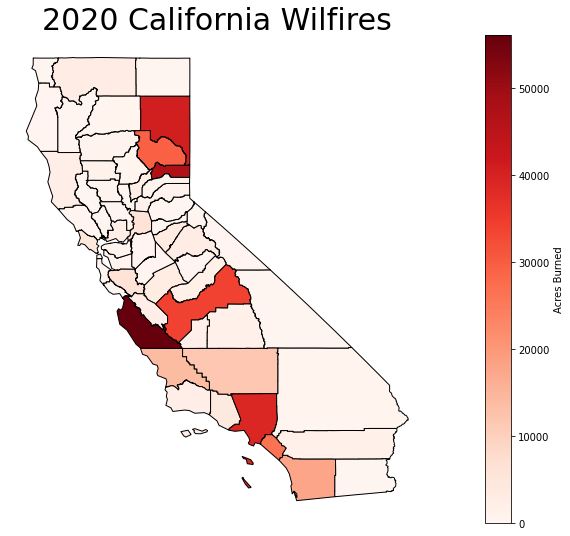

In [ ]:
### Gradient coloring code
fig, gax = plt.subplots(figsize=(10,10))
plt.axis("off")

cali_2020.plot(ax=gax , edgecolor='black', column = 'incident_acres_burned', legend = False, cmap = 'Reds')
norm = colors.Normalize(vmin=min(cali_2020['incident_acres_burned']), vmax=max(cali_2020['incident_acres_burned']))
cbar = plt.cm.ScalarMappable(norm = norm, cmap='Reds')


plt.title("2020 California Wilfires", fontsize = 30)
divider = make_axes_locatable(gax)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax_cbar = fig.colorbar(cbar, cax = cax)
# add label for the colorbar
ax_cbar.set_label('Acres Burned')


plt.show()

In [ ]:
location_data = wildfire_data[wildfire_data.year == 2020]
geometry = [Point(xy) for xy in zip(location_data['incident_longitude'],location_data['incident_latitude'] )]
crs = {'init':"EPSG:4326"}
geo_loc = gpd.GeoDataFrame(location_data, crs = crs, geometry = geometry)
geo_loc.head()

/opt/venv/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,incident_county,incident_acres_burned,incident_longitude,incident_latitude,incident_dateonly_extinguished,month,year,geometry
1453,Humboldt,15,-123.637841,40.511092,NaT,2,2020,POINT (-123.63784 40.51109)
1454,Sierra,102,-120.329185,39.692300,2020-02-20,2,2020,POINT (-120.32919 39.69230)
1455,Tehama,75,-122.847222,40.335833,2020-02-24,2,2020,POINT (-122.84722 40.33583)
1456,Lassen,57,-120.493920,40.621550,2020-02-23,2,2020,POINT (-120.49392 40.62155)
1457,"Glenn, Mendocino",211,-122.941111,39.756389,2020-03-03,2,2020,POINT (-122.94111 39.75639)


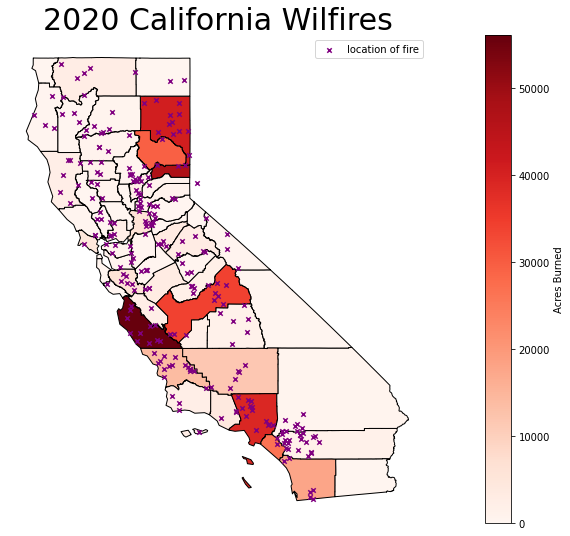

In [ ]:
### Gradient coloring code
fig, gax = plt.subplots(figsize=(10,10))
plt.axis("off")

cali_2020.plot(ax=gax , edgecolor='black', column = 'incident_acres_burned', legend = False, cmap = 'Reds')
norm = colors.Normalize(vmin=min(cali_2020['incident_acres_burned']), vmax=max(cali_2020['incident_acres_burned']))
cbar = plt.cm.ScalarMappable(norm = norm, cmap='Reds')

geo_loc.plot(ax = gax, markersize = 20, marker = 'x', color = 'purple', label = "location of fire")

plt.legend()
plt.title("2020 California Wilfires", fontsize = 30)
divider = make_axes_locatable(gax)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax_cbar = fig.colorbar(cbar, cax = cax)
# add label for the colorbar
ax_cbar.set_label('Acres Burned')


plt.show()

# Maps to Show change in risk values across months :) 

In [ ]:
# read in aggregated risks
CA_risks = pd.read_csv("/home/jovyan/work/pred_agg.csv")

min_risk = CA_risks.prediction.min()
max_risk = CA_risks.prediction.max()

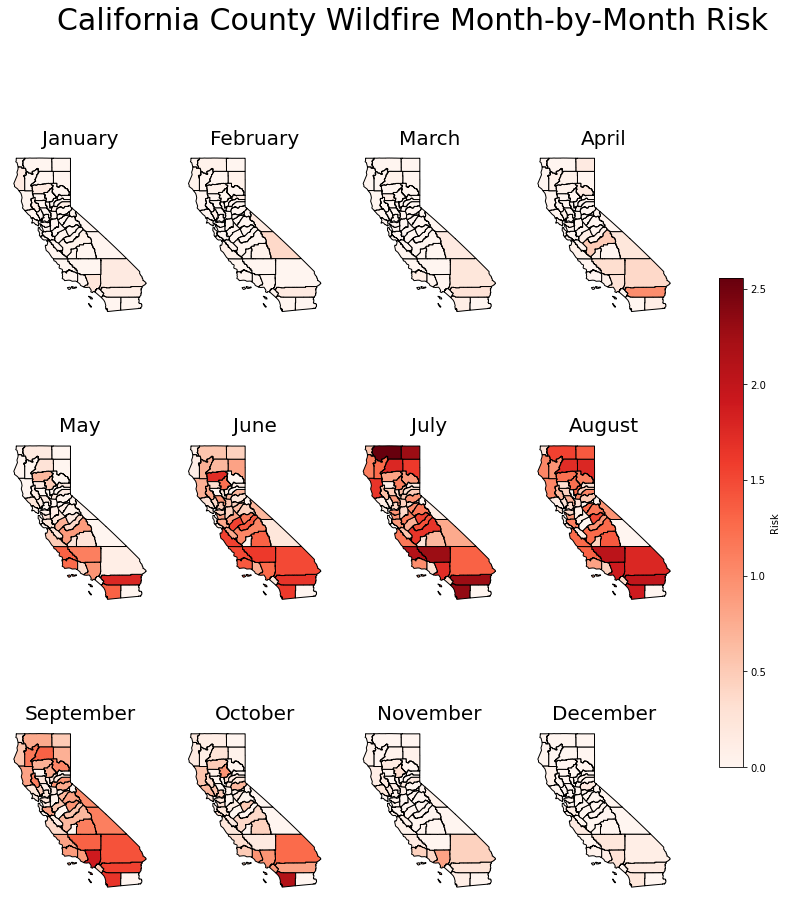

In [ ]:
# make plot of 12 

fig, ((gax1, gax2, gax3, gax4), (gax5, gax6, gax7, gax8), (gax9, gax10, gax11, gax12)) = plt.subplots(nrows = 3, ncols = 4, figsize=(15, 15))
for gax in [gax1, gax2, gax3, gax4, gax5, gax6, gax7, gax8, gax9, gax10, gax11, gax12]:
    gax.axis('off')

def get_month_data(m):
    return pd.merge(cali_shape, CA_risks[CA_risks.month ==m], how = 'left', left_on = "NAME", right_on = "county")

gax1 = get_month_data(1).plot(ax = gax1, edgecolor='black', column = 'prediction', legend = False, cmap = 'Reds', vmin = min_risk, vmax = max_risk)
gax2 = get_month_data(2).plot(ax = gax2, edgecolor='black', column = 'prediction', legend = False, cmap = 'Reds', vmin = min_risk, vmax = max_risk)
gax3 = get_month_data(3).plot(ax = gax3, edgecolor='black', column = 'prediction', legend = False, cmap = 'Reds', vmin = min_risk, vmax = max_risk)
gax4 = get_month_data(4).plot(ax = gax4, edgecolor='black', column = 'prediction', legend = False, cmap = 'Reds', vmin = min_risk, vmax = max_risk)
gax5 = get_month_data(5).plot(ax = gax5, edgecolor='black', column = 'prediction', legend = False, cmap = 'Reds', vmin = min_risk, vmax = max_risk)
gax6 = get_month_data(6).plot(ax = gax6, edgecolor='black', column = 'prediction', legend = False, cmap = 'Reds', vmin = min_risk, vmax = max_risk)
gax7 = get_month_data(7).plot(ax = gax7, edgecolor='black', column = 'prediction', legend = False, cmap = 'Reds', vmin = min_risk, vmax = max_risk)
gax8 = get_month_data(8).plot(ax = gax8, edgecolor='black', column = 'prediction', legend = False, cmap = 'Reds', vmin = min_risk, vmax = max_risk)
gax9 = get_month_data(9).plot(ax = gax9, edgecolor='black', column = 'prediction', legend = False, cmap = 'Reds', vmin = min_risk, vmax = max_risk)
gax10 = get_month_data(10).plot(ax = gax10, edgecolor='black', column = 'prediction', legend = False, cmap = 'Reds', vmin = min_risk, vmax = max_risk)
gax11 = get_month_data(11).plot(ax = gax11, edgecolor='black', column = 'prediction', legend = False, cmap = 'Reds', vmin = min_risk, vmax = max_risk)
gax12 = get_month_data(12).plot(ax = gax12, edgecolor='black', column = 'prediction', legend = False, cmap = 'Reds', vmin = min_risk, vmax = max_risk)
gax1.set_title("January", fontsize = 20)
gax2.set_title("February", fontsize = 20)
gax3.set_title("March", fontsize = 20)
gax4.set_title("April", fontsize = 20)
gax5.set_title("May", fontsize = 20)
gax6.set_title("June", fontsize = 20)
gax7.set_title("July", fontsize = 20)
gax8.set_title("August", fontsize = 20)
gax9.set_title("September", fontsize = 20)
gax10.set_title("October", fontsize = 20)
gax11.set_title("November", fontsize = 20)
gax12.set_title("December", fontsize = 20)

norm = colors.Normalize(vmin = min_risk, vmax = max_risk)
cbar = plt.cm.ScalarMappable(norm = norm, cmap='Reds')

fig.suptitle("California County Wildfire Month-by-Month Risk", fontsize = 30)
# divider = make_axes_locatable(gax4)
# cax = divider.append_axes("right", size="5%", pad=0.05)
ax_cbar = fig.colorbar(cbar, ax = ((gax1, gax2, gax3, gax4), (gax5, gax6, gax7, gax8), (gax9, gax10, gax11, gax12)), shrink = 0.6 )
# add label for the colorbar
ax_cbar.set_label('Risk')

plt.savefig('CA_monthly_risks.png')


In [ ]:
CA_risks.head()


,month,county,prediction
0,1,Alameda,0.0
1,1,Alpine,0.0
2,1,Amador,0.0
3,1,Butte,0.0
4,1,Calaveras,0.0


In [ ]:
cali_shape.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,107,00277318,06107,Tulare,Tulare County,06,H1,G4020,None,47300,None,A,12494707314,37391604,+36.2288317,-118.7810618,"POLYGON ((-118.36059 36.74477, -118.36013 36.7..."
1,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820029,43810423,+38.1846184,-120.5593996,"POLYGON ((-120.01995 38.43352, -120.02020 38.4..."
2,06,047,00277288,06047,Merced,Merced County,06,H1,G4020,None,32900,None,A,5011554680,112760479,+37.1948063,-120.7228019,"POLYGON ((-120.05205 37.18311, -120.05215 37.1..."
3,06,079,00277304,06079,San Luis Obispo,San Luis Obispo County,06,H1,G4020,None,42020,None,A,8543230300,820974619,+35.3852268,-120.4475409,"POLYGON ((-120.21398 35.78928, -120.20627 35.7..."
4,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,42220,None,A,4081430061,497530414,+38.5250258,-122.9376050,"MULTIPOLYGON (((-122.51299 38.13180, -122.4956..."
